In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/yolo_detect_newdata

/content/drive/MyDrive/yolo_detect_newdata


In [ ]:
!ls

robov5.zip


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/yolo_detect_newdata/robov5.zip'
extract_path = '/content/drive/MyDrive/yolo_detect_newdata'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
%pwd

'/content/drive/MyDrive/yolo_detect_newdata'

In [ ]:
#git clone v5
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16098, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 16098 (delta 1), reused 5 (delta 0), pack-reused 16089
Receiving objects: 100% (16098/16098), 14.84 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (11024/11024), done.


In [ ]:
# install thư viện cần thiết
!pip install -r /content/drive/MyDrive/yolo_detect_newdata/yolov5/requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
!pip install ultralytics

In [ ]:
%cd yolov5

/content/drive/MyDrive/yolo_detect_newdata/yolov5


In [ ]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-250-ga04b49f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


#preprocess images size

In [ ]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, size=(640, 640)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        with Image.open(input_path) as img:
            resized_img = img.resize(size)
            resized_img.save(output_path)

# Sử dụng hàm để resize ảnh trong thư mục input_images và lưu vào thư mục output_images
# resize_images(r"C:\Users\trand\Documents\study\university\23_24_ki1\ML\final_test\robov5\R.403_goc", r"C:\Users\trand\Documents\study\university\23_24_ki1\ML\final_test\robov5\R.403_resized")

#desribe the data

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Đường dẫn đến các thư mục cần thống kê
folder_paths = ['/content/drive/MyDrive/NĂM 3 RÙI ĐÓ/KỲ 1 /MỜ "CHIN" LƠN NING/DATACUOIKY/yolov5-master/datasets/Vietnam-Traffic-Sign-Detection-6/test/images_test',
                '/content/drive/MyDrive/NĂM 3 RÙI ĐÓ/KỲ 1 /MỜ "CHIN" LƠN NING/DATACUOIKY/yolov5-master/datasets/Vietnam-Traffic-Sign-Detection-6/train/images_train',
                '/content/drive/MyDrive/NĂM 3 RÙI ĐÓ/KỲ 1 /MỜ "CHIN" LƠN NING/DATACUOIKY/yolov5-master/datasets/Vietnam-Traffic-Sign-Detection-6/valid/images_valid']

In [ ]:
# Tạo danh sách tệp và thư mục tương ứng
file_counts = []
folders = []

for folder_path in folder_paths:
    files = os.listdir(folder_path)
    file_counts.append(len(files))
    folders.append(os.path.basename(folder_path))

# Tạo DataFrame với thông tin về số lượng tệp và thư mục
data = {'Thư mục': folders, 'Số lượng tệp': file_counts}
df = pd.DataFrame(data)

In [ ]:
df.head()

,Thư mục,Số lượng tệp
0,images_test,614
1,images_train,2280
2,images_valid,786


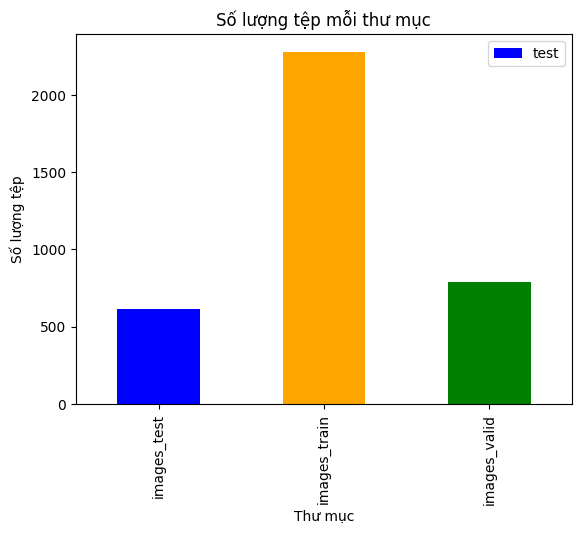

In [ ]:
# Vẽ biểu đồ cột với mỗi thư mục có một màu
ax = df.plot(x='Thư mục', y='Số lượng tệp', kind='bar', legend=True, color=['blue', 'orange', 'green'])
plt.title('Số lượng tệp mỗi thư mục')
plt.xlabel('Thư mục')
plt.ylabel('Số lượng tệp')

# Hiện legend
ax.legend(["test", "train", "valid"])
plt.show()

In [ ]:
import os

def count_classes_in_folder(folder_path):
    class_counts = {}

    # Duyệt qua từng file trong thư mục
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)

        # Đọc nội dung từ file
        with open(filepath, 'r') as file:
            lines = file.readlines()

            # Tổng kết số lượng class trong file
            for line in lines:
                class_id = line.split(' ')[0]
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

    return class_counts

# Đường dẫn đến các thư mục cần thống kê
train_folder = 'path'
test_folder = 'path'
valid_folder = 'path'

# Thống kê số lượng class cho từng thư mục
train_class_counts = count_classes_in_folder(train_folder)
test_class_counts = count_classes_in_folder(test_folder)
valid_class_counts = count_classes_in_folder(valid_folder)

# In thông tin thống kê mô tả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

print("\nValid Class Counts:")
print(valid_class_counts)

Train Class Counts:
{'1': 50, '27': 48, '43': 8, '52': 48, '18': 193, '45': 40, '10': 4, '44': 14, '12': 1, '5': 5, '31': 3, '14': 15, '20': 127, '57': 20, '11': 26, '34': 14, '35': 15, '33': 19, '26': 1, '55': 3, '13': 18, '7': 9, '2': 8, '9': 5, '19': 2, '39': 3, '24': 3, '38': 7, '46': 7, '16': 2, '53': 11, '50': 3, '40': 2, '4': 13, '21': 131, '36': 16, '30': 9, '49': 3, '29': 17, '0': 2, '6': 9, '28': 6, '25': 3, '47': 5, '3': 1, '51': 1, '15': 1, '37': 3, '48': 3, '32': 1, '17': 1, '41': 9}

Test Class Counts:
{'46': 36, '1': 167, '27': 152, '45': 146, '52': 153, '18': 799, '43': 24, '10': 11, '44': 33, '12': 8, '5': 24, '31': 26, '14': 39, '20': 518, '30': 37, '11': 95, '57': 102, '34': 49, '35': 61, '33': 57, '26': 10, '25': 12, '55': 15, '13': 63, '7': 78, '2': 34, '9': 10, '19': 2, '39': 17, '24': 17, '54': 13, '38': 15, '16': 5, '53': 42, '37': 21, '50': 2, '40': 13, '4': 53, '36': 53, '21': 416, '49': 22, '29': 26, '0': 13, '6': 55, '3': 9, '28': 19, '8': 15, '47': 15, '56'

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_classes_in_folder(folder_path):
    class_counts = {}

    # Lặp qua từng file trong thư mục
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)

            # Đọc nội dung của file
            with open(file_path, "r") as file:
                lines = file.readlines()

            # Lặp qua từng dòng trong file và đếm số lượng class
            for line in lines:
                class_id = line.split()[0]
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

    return class_counts

# Đường dẫn đến các thư mục cần thống kê
train_folder = 'path'
test_folder = 'path'
valid_folder = 'path'

# Thống kê số lượng class trong mỗi file
train_class_counts = count_classes_in_folder(train_folder)
test_class_counts = count_classes_in_folder(test_folder)
valid_class_counts = count_classes_in_folder(valid_folder)

# Tạo DataFrame từ thông tin thống kê
train_df = pd.DataFrame(list(train_class_counts.items()), columns=['Class', 'Số lượng'])
test_df = pd.DataFrame(list(test_class_counts.items()), columns=['Class', 'Số lượng'])
valid_df = pd.DataFrame(list(valid_class_counts.items()), columns=['Class', 'Số lượng'])

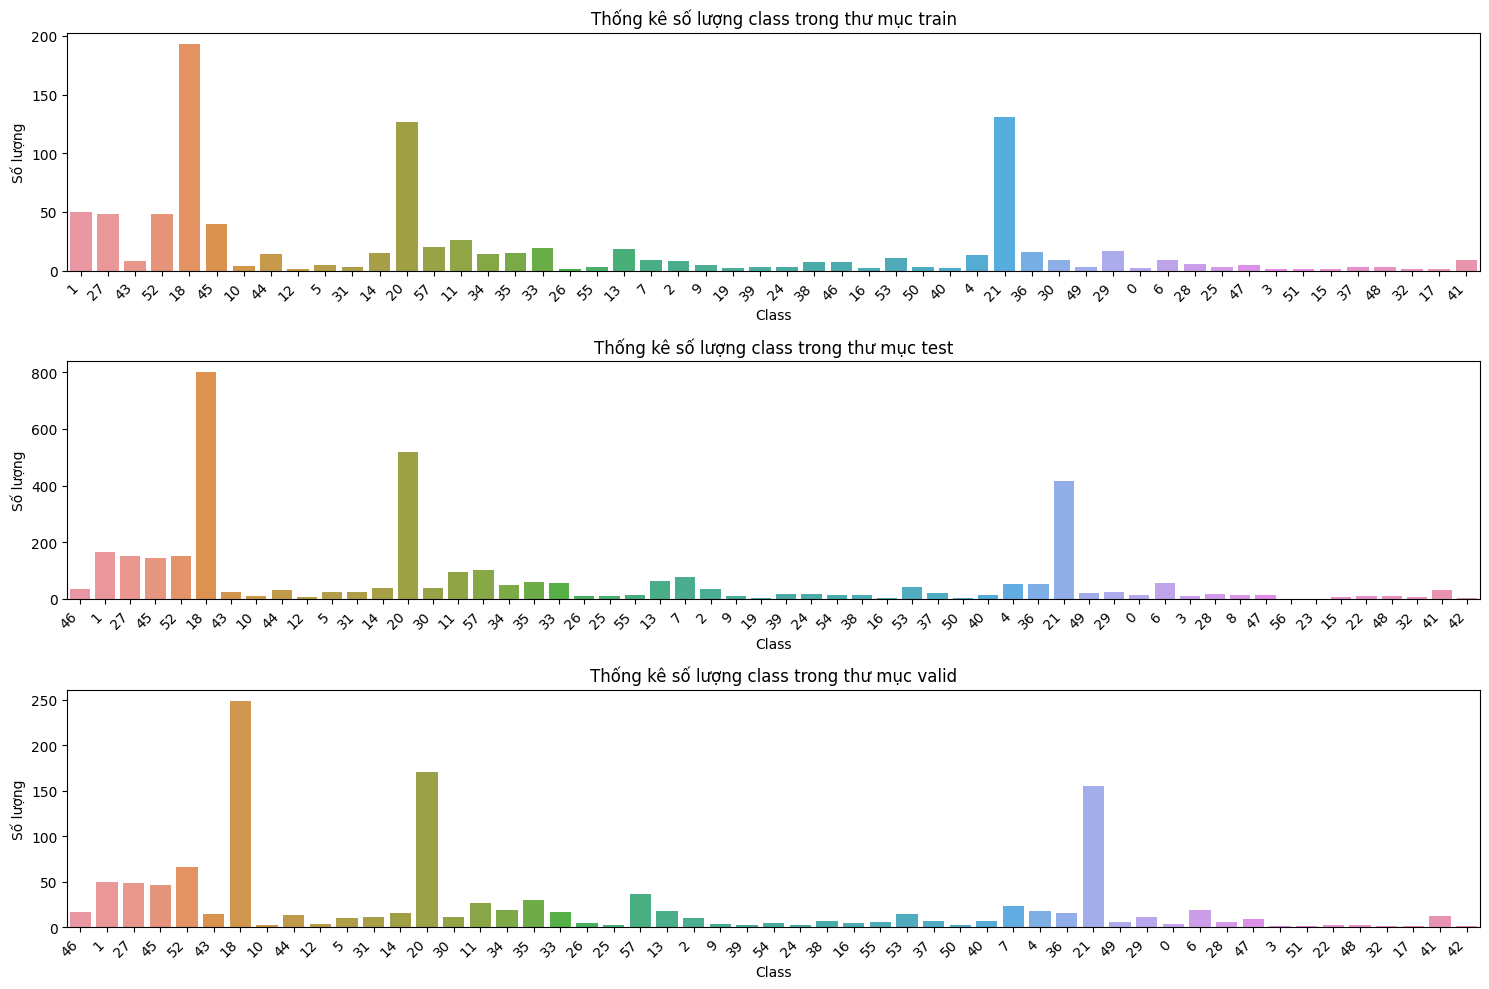

In [ ]:
# Vẽ biểu đồ bằng Seaborn
plt.figure(figsize=(15, 10))

# Biểu đồ train
plt.subplot(3, 1, 1)
sns.barplot(data=train_df, x='Class', y='Số lượng')
plt.title('Thống kê số lượng class trong thư mục train')
plt.xlabel('Class')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')

# Biểu đồ test
plt.subplot(3, 1, 2)
sns.barplot(data=test_df, x='Class', y='Số lượng')
plt.title('Thống kê số lượng class trong thư mục test')
plt.xlabel('Class')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')

# Biểu đồ valid
plt.subplot(3, 1, 3)
sns.barplot(data=valid_df, x='Class', y='Số lượng')
plt.title('Thống kê số lượng class trong thư mục valid')
plt.xlabel('Class')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#setting file yaml

In [ ]:
# # YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# # COCO 2017 dataset http://cocodataset.org by Microsoft
# # Example usage: python train.py --data coco.yaml
# # parent
# # ├── yolov5
# # └── datasets
# #     └── coco  ← downloads here (20.1 GB)


# # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
# path: /content/drive/MyDrive/roboYOLO
# train: /content/drive/MyDrive/roboYOLO/train/images
# val: /content/drive/MyDrive/roboYOLO/valid/images
# test: /content/drive/MyDrive/roboYOLO/test/images

# # Classes
# names:
#   0: DP.135
#   1: P.102
#   2: P.103a
#   3: P.103b
#   4: P.103c
#   5: P.104
#   6: P.106a
#   7: P.106b
#   8: P.107a
#   9: P.112
#   10: P.115
#   11: P.117
#   12: P.123a
#   13: P.123b
#   14: P.124a
#   15: P.124b
#   16: P.124c
#   17: P.125
#   18: P.127
#   19: P.128
#   20: P.130
#   21: P.131a
#   22: P.137
#   23: P.245a
#   24: R.301c
#   25: R.301d
#   26: R.301e
#   27: R.302a
#   28: R.302b
#   29: R.303
#   30: R.407a
#   31: R.409
#   32: R.425
#   33: R.434
#   34: S.509a
#   35: W.201a
#   36: W.201b
#   37: W.202a
#   38: W.202b
#   39: W.203b
#   40: W.203c
#   41: W.205a
#   42: W.205b
#   43: W.205d
#   44: W.207a
#   45: W.207b
#   46: W.207c
#   47: W.208
#   48: W.209
#   49: W.210
#   50: W.219
#   51: W.221b
#   52: W.224
#   53: W.225
#   54: W.227
#   55: W.233
#   56: W.235
#   57: W.245a
#   58:
#   59: R.403

#train model the 1st time

In [ ]:
# Đọc model từ file .pt
model = torch.load('/content/drive/MyDrive/yolo_detect_newdata/yolov5/yolov5s.pt')

# Kiểm tra cấu trúc của model
print(model)

{'epoch': -1, 'best_fitness': None, 'model': DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  

In [ ]:
!python /content/drive/MyDrive/yolo_detect_newdata/yolov5/train.py --img 640 --epochs 13 --data coco.yaml --weights yolov5s.pt

2023-12-17 08:23:32.934009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 08:23:32.934069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 08:23:32.935462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=13, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/

In [ ]:
# Đọc model từ file .pt
model = torch.load('/content/drive/MyDrive/yolo_detect_newdata/yolov5/runs/train/exp/weights/best.pt')

# Kiểm tra cấu trúc của model
print(model)

# 2nd training model with best weight

In [ ]:
!python /content/drive/MyDrive/yolo_detect_newdata/yolov5/train.py --img 640 --epochs 100 --data coco.yaml --weights '/content/drive/MyDrive/yolo_detect_newdata/yolov5/runs/train/exp/weights/best.pt'

2023-12-17 08:55:04.455587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 08:55:04.455643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 08:55:04.457085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/yolo_detect_newdata/yolov5/runs/train/exp/weights/best.pt, cfg=, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, s

In [ ]:
import pandas as pd

In [ ]:
rs = pd.read_csv

# detect the video

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolo_detect_newdata/yolov5/runs/train/exp2/weights/best.pt --source '/content/drive/MyDrive/roboYOLO/10000000_7183661685023634_4376501263544049985_n.mp4'

detect: weights=['/content/drive/MyDrive/yolo_detect_newdata/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/roboYOLO/10000000_7183661685023634_4376501263544049985_n.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-250-ga04b49f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7171945 parameters, 0 gradients, 16.3 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/2263) /content/drive/MyDrive/roboYOLO/10000000_7183661685023634_4376501263544049985_n.mp4: 640x384 1 P.131a, 50.7ms
video 1/1 (2/2263) /content/drive/MyDrive/ro